In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns # визуализация данных
import numpy as np
%matplotlib inline

In [20]:
import os
lst = os.listdir('./extracted_features/size_group5')

lst_data = []
for file in lst:
    lst_data.append(pd.read_csv('./extracted_features/size_group5/' + file))

In [21]:
all_data = pd.concat(lst_data, ignore_index=True)
all_data = all_data.drop(['Unnamed: 0'], axis = 1)
all_data

,Average_Angle,Max_Angle,Std_Angle,Average_Dist,Max_Dist,Std_Dist,Average_Time,Max_Time,Std_Time,Condition
0,9.608599,21.477946,9.006910,2.079669,3.162278,0.689185,108.34836,525.7372,208.694420,1
1,14.394037,17.102729,1.873429,6.071207,8.062258,1.593878,4.00110,4.0117,0.008692,1
2,6.678453,12.724356,5.389976,10.799350,12.369317,0.986940,4.00198,4.0089,0.003741,1
3,4.153833,9.272602,3.054270,12.445818,14.142136,1.049575,4.00288,4.0110,0.007838,1
4,0.000000,0.000000,0.000000,10.800000,12.000000,1.166190,4.00056,4.0126,0.007560,1
...,...,...,...,...,...,...,...,...,...,...
69536,27.000000,45.000000,22.045408,1.448528,2.000000,0.319008,4.79910,8.0017,1.601305,1
69537,54.000000,90.000000,33.674916,1.082843,1.414214,0.165685,4.00282,4.0106,0.003907,1
69538,54.000000,90.000000,33.674916,1.082843,1.414214,0.165685,4.80108,8.0017,1.600310,1
69539,90.000000,90.000000,0.000000,1.000000,1.000000,0.000000,19.20438,36.0081,12.499285,1


In [22]:
n_samples = len(all_data[all_data.Condition == 0])

In [23]:
from sklearn.utils import resample
sampled_0 = resample(all_data[all_data.iloc[:, -1] == 0], replace = False, n_samples = n_samples, random_state=39)
sampled_1 = resample(all_data[all_data.iloc[:, -1] == 1], replace = False, n_samples = n_samples, random_state=39)

all_data = pd.concat([sampled_0, sampled_1])

In [24]:
len(all_data[all_data.Condition == 0])

24645

In [25]:
len(all_data[all_data.Condition == 1])

24645

<AxesSubplot:>

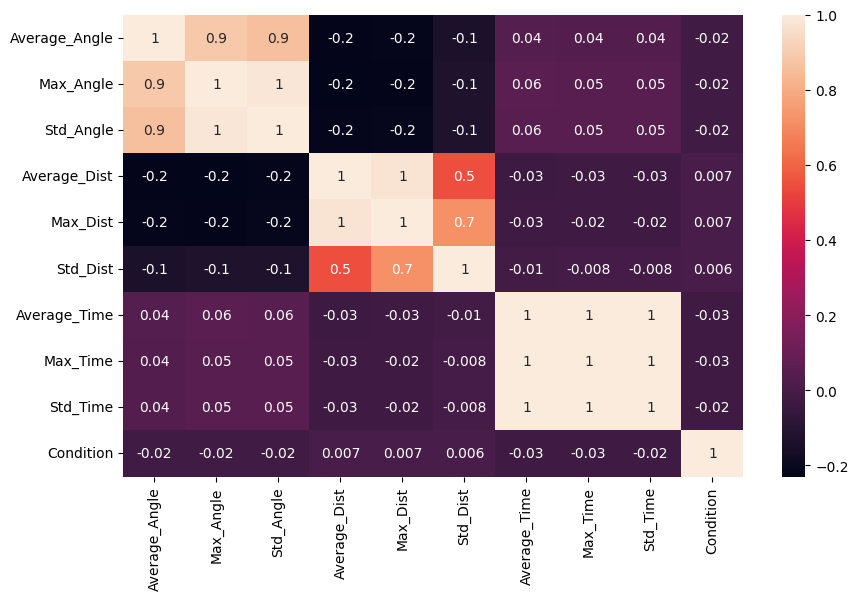

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(all_data.corr(), annot = True, fmt = '.1g')

In [27]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49290 entries, 51619 to 11908
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Average_Angle  49290 non-null  float64
 1   Max_Angle      49290 non-null  float64
 2   Std_Angle      49290 non-null  float64
 3   Average_Dist   49290 non-null  float64
 4   Max_Dist       49290 non-null  float64
 5   Std_Dist       49290 non-null  float64
 6   Average_Time   49290 non-null  float64
 7   Max_Time       49290 non-null  float64
 8   Std_Time       49290 non-null  float64
 9   Condition      49290 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 4.1 MB


array([[<AxesSubplot:title={'center':'Average_Angle'}>,
        <AxesSubplot:title={'center':'Max_Angle'}>,
        <AxesSubplot:title={'center':'Std_Angle'}>],
       [<AxesSubplot:title={'center':'Average_Dist'}>,
        <AxesSubplot:title={'center':'Max_Dist'}>,
        <AxesSubplot:title={'center':'Std_Dist'}>],
       [<AxesSubplot:title={'center':'Average_Time'}>,
        <AxesSubplot:title={'center':'Max_Time'}>,
        <AxesSubplot:title={'center':'Std_Time'}>],
       [<AxesSubplot:title={'center':'Condition'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

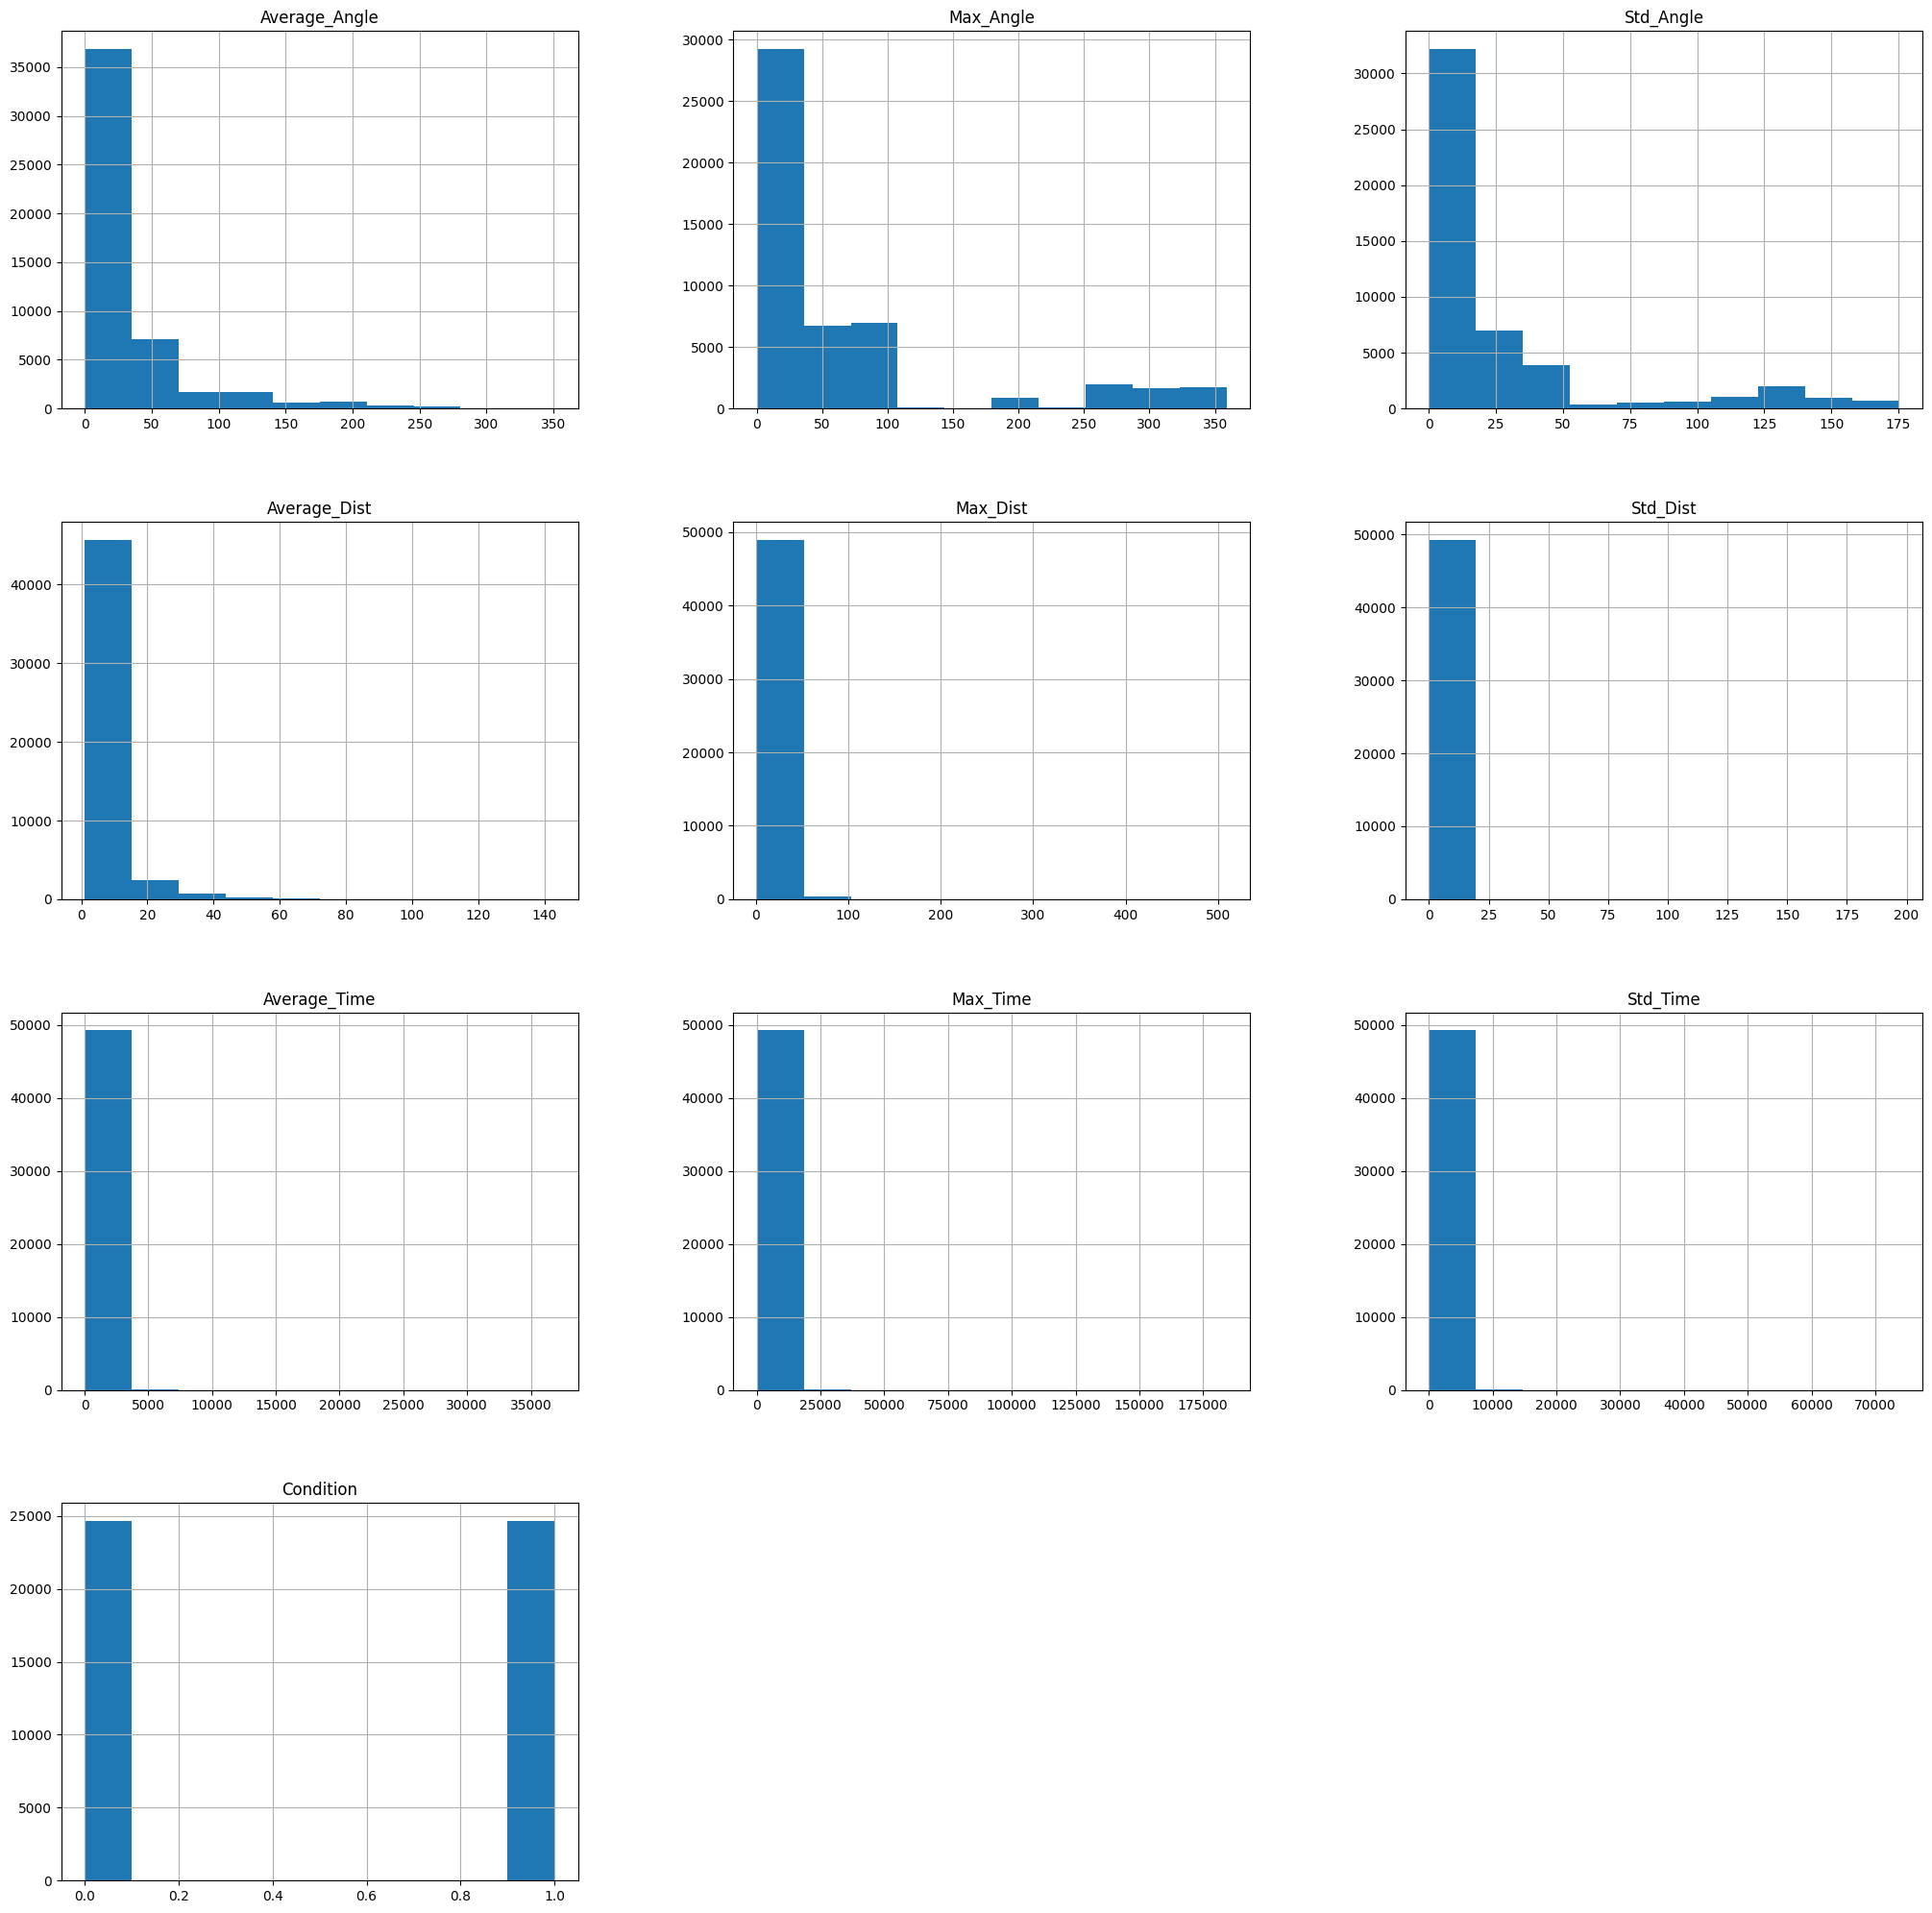

In [28]:
all_data.hist(figsize = (25, 25), grid = True)

In [29]:
Dup_Rows = all_data[all_data.duplicated()]
Dup_Rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Average_Angle  0 non-null      float64
 1   Max_Angle      0 non-null      float64
 2   Std_Angle      0 non-null      float64
 3   Average_Dist   0 non-null      float64
 4   Max_Dist       0 non-null      float64
 5   Std_Dist       0 non-null      float64
 6   Average_Time   0 non-null      float64
 7   Max_Time       0 non-null      float64
 8   Std_Time       0 non-null      float64
 9   Condition      0 non-null      int64  
dtypes: float64(9), int64(1)
memory usage: 0.0 bytes


<AxesSubplot:xlabel='Max_Dist'>

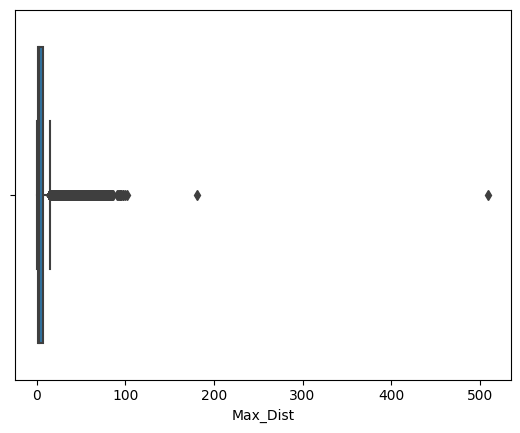

In [30]:
sns.boxplot(x=all_data['Max_Dist'])

In [31]:
Q1 = all_data.quantile(0.25)
Q3 = all_data.quantile(0.75)
IQR = Q3 - Q1
all_data = all_data[~((all_data < (Q1 - 1.5 * IQR)) |(all_data > (Q3 + 1.5 * IQR))).any(axis=1)]
all_data.shape

(30847, 10)

array([[<AxesSubplot:title={'center':'Average_Angle'}>,
        <AxesSubplot:title={'center':'Max_Angle'}>,
        <AxesSubplot:title={'center':'Std_Angle'}>],
       [<AxesSubplot:title={'center':'Average_Dist'}>,
        <AxesSubplot:title={'center':'Max_Dist'}>,
        <AxesSubplot:title={'center':'Std_Dist'}>],
       [<AxesSubplot:title={'center':'Average_Time'}>,
        <AxesSubplot:title={'center':'Max_Time'}>,
        <AxesSubplot:title={'center':'Std_Time'}>],
       [<AxesSubplot:title={'center':'Condition'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

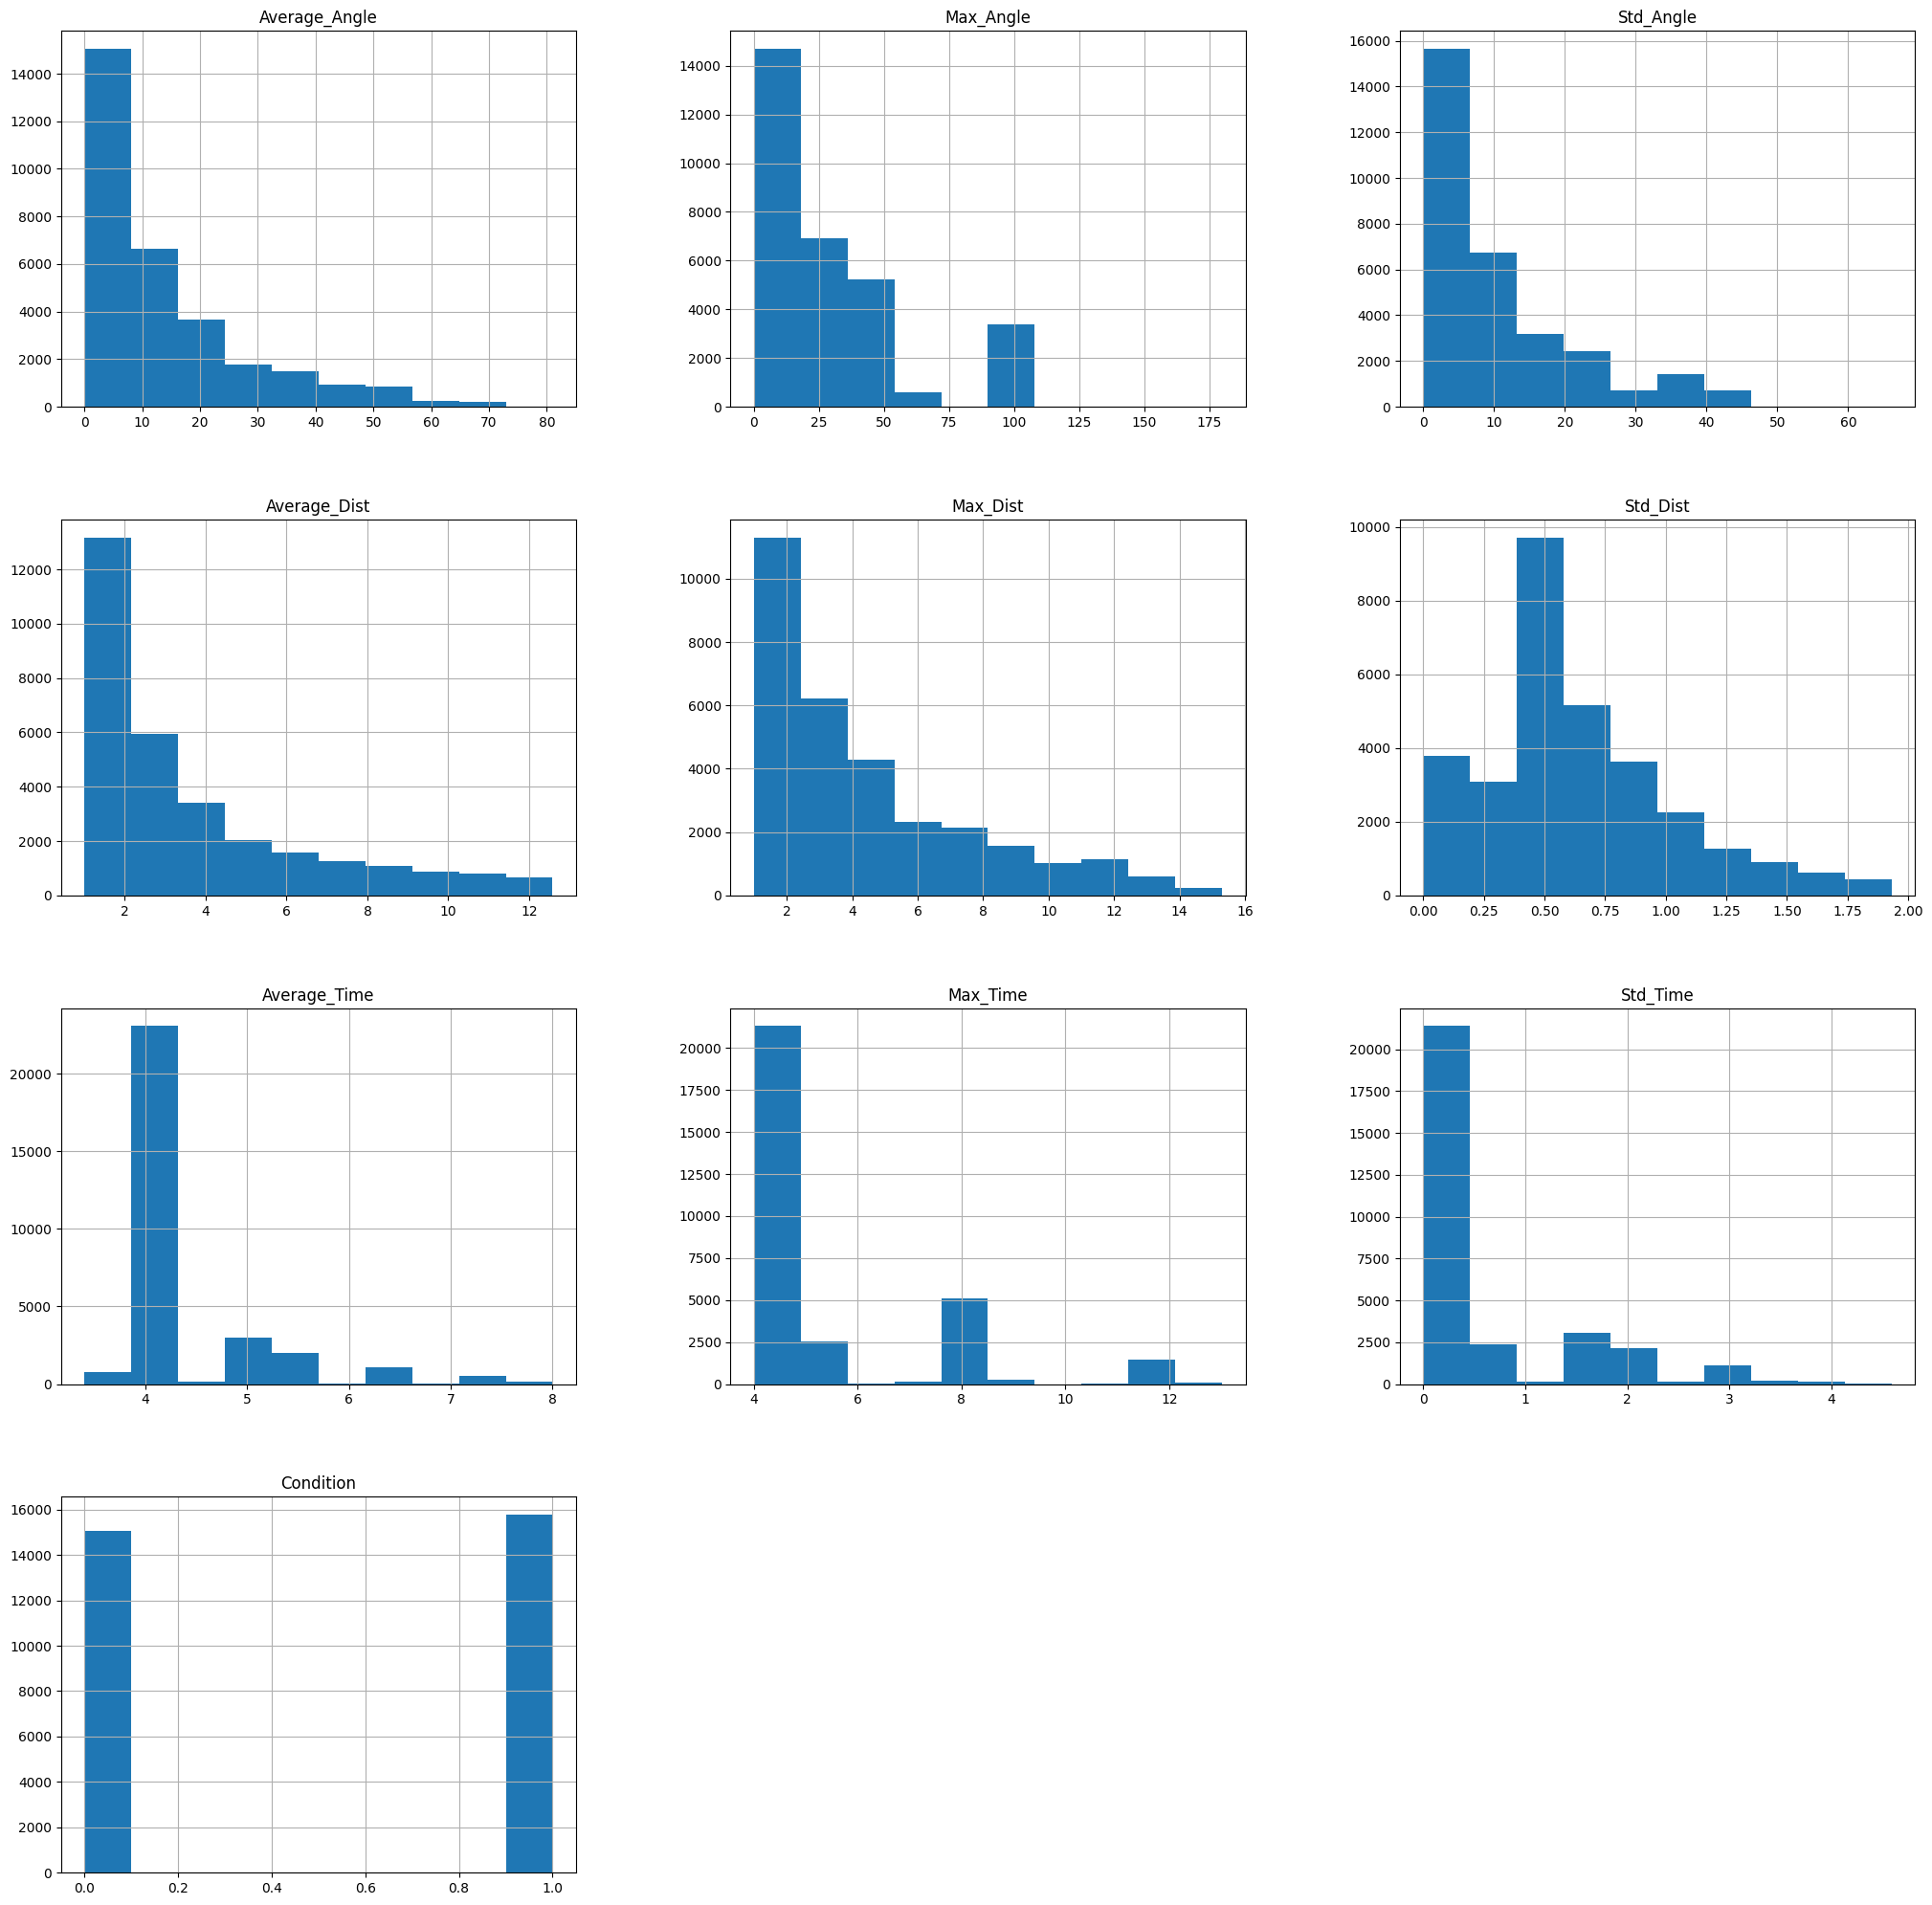

In [32]:
all_data.hist(figsize = (25, 25), grid = True)

<AxesSubplot:xlabel='Max_Dist'>

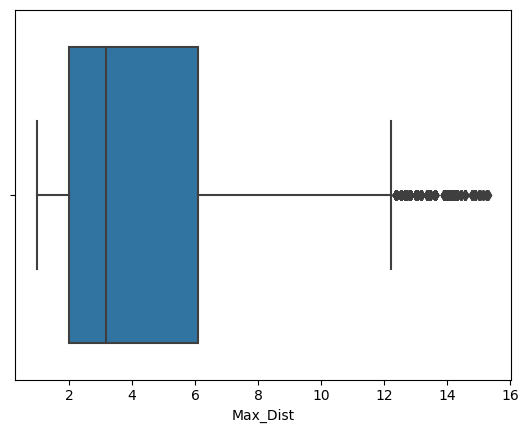

In [33]:
sns.boxplot(x=all_data['Max_Dist'])

<AxesSubplot:>

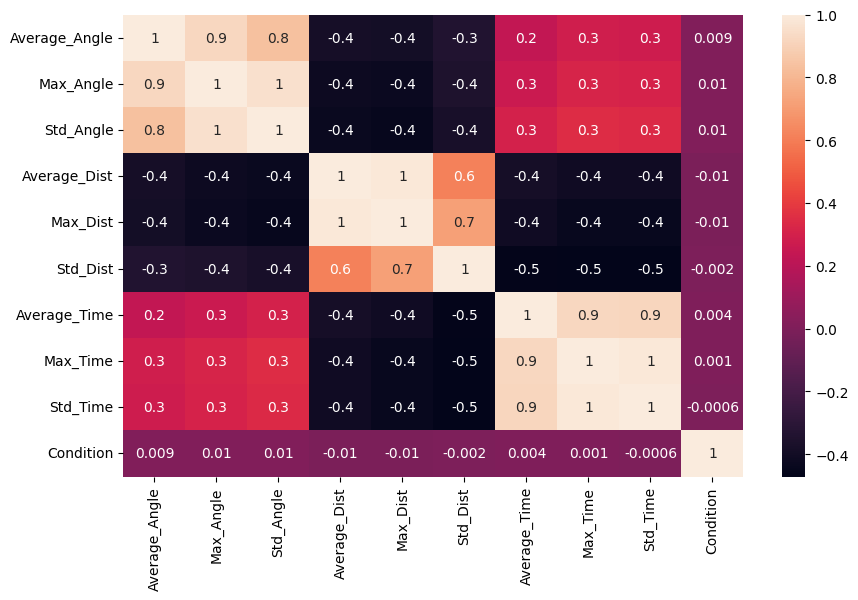

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(all_data.corr(), annot = True, fmt = '.1g')

Remain features: average_angle, std_dist, max_dist

In [35]:
all_data = all_data.drop(['Max_Angle', 'Std_Angle', 'Average_Dist', 'Max_Dist', 'Std_Time', 'Average_Time', 'Max_Time'], axis = 1)
all_data

,Average_Angle,Std_Dist,Condition
51619,36.000000,0.165685,0
42214,54.000000,0.165685,0
55651,2.080278,1.486852,0
47106,18.000000,0.392829,0
39423,6.442600,0.239659,0
...,...,...,...
17482,15.303065,0.431338,1
18096,4.602392,0.373371,1
26792,54.000000,0.202922,1
8732,5.313010,0.489898,1


<AxesSubplot:>

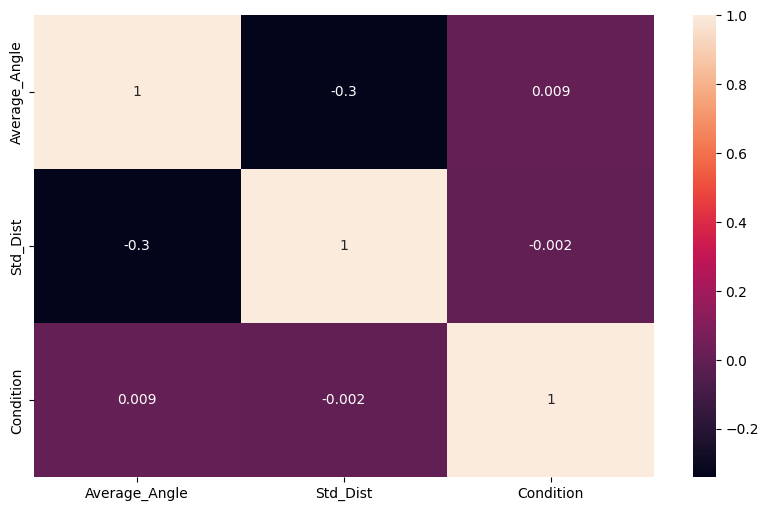

In [36]:
plt.figure(figsize=(10, 6))
sns.heatmap(all_data.corr(), annot = True, fmt = '.1g')

Обучение

In [37]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, label_binarize

In [38]:
X = all_data.drop('Condition', axis = 1)
y = all_data.Condition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

Градиентый бустинг

In [39]:
from xgboost import XGBClassifier

In [40]:
grid_param = {'learning_rate': [0.02], 
        'min_child_weight': [1, 5],
        'max_depth': [10, 50, 100],
        'n_estimators': [50, 100, 500]
        }

In [41]:
xgb = XGBClassifier()
grid_xgb = GridSearchCV(xgb, grid_param, cv = 5, n_jobs = -1)

grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.02], 'max_depth': [10, 50, 100],
                         'min_child_weight': [1, 5],
                         'n_estimators': [50, 100, 500]})

In [42]:
best_clf = grid_xgb.best_estimator_
best_clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.02,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 10,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 500,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [43]:
y_pred = best_clf.predict(X_test)

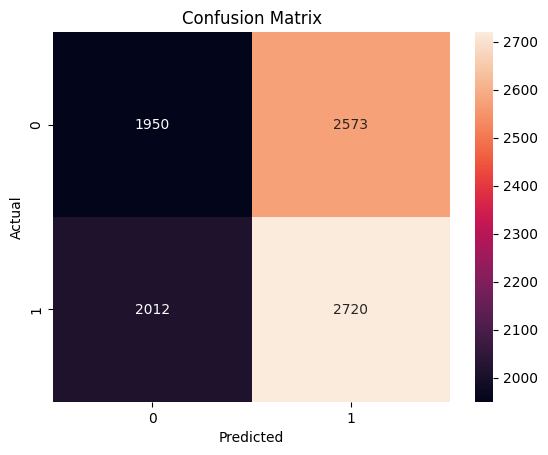

In [44]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [45]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.49      0.43      0.46      4523
     class 1       0.51      0.57      0.54      4732

    accuracy                           0.50      9255
   macro avg       0.50      0.50      0.50      9255
weighted avg       0.50      0.50      0.50      9255



Случайный лес

In [46]:
grid_param = {
    'n_estimators': [50, 100, 200, 400],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': range(2, 16, 4)
}

In [47]:
rfc = RandomForestClassifier()
grid_rfc = GridSearchCV(rfc, grid_param, cv = 3, n_jobs=-1)

grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 16, 4),
                         'n_estimators': [50, 100, 200, 400]})

In [48]:
best_clf = grid_rfc.best_estimator_
best_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'log_loss',
 'max_depth': 6,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [49]:
y_pred = best_clf.predict(X_test)

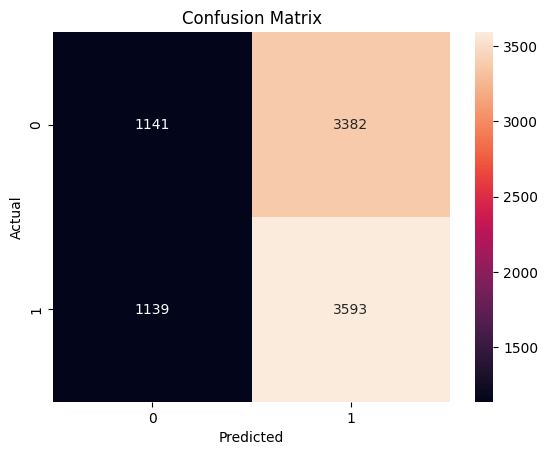

In [50]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [51]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      0.25      0.34      4523
     class 1       0.52      0.76      0.61      4732

    accuracy                           0.51      9255
   macro avg       0.51      0.51      0.47      9255
weighted avg       0.51      0.51      0.48      9255



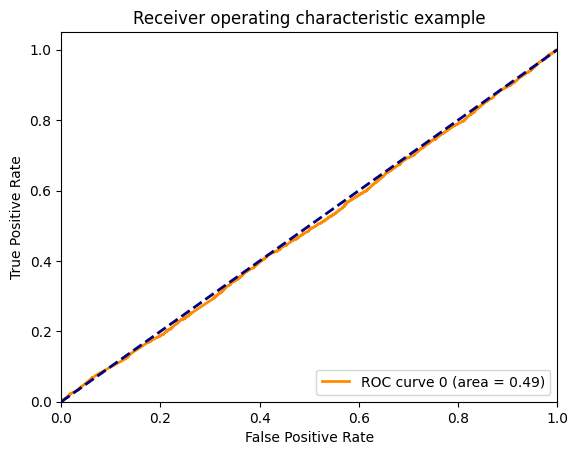

In [52]:
y_roc = label_binarize(y, classes = [0, 1])
y_test_roc = label_binarize(y_test, classes = [0, 1])
n_classes = y_roc.shape[1]

y_score = best_clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve 0 (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

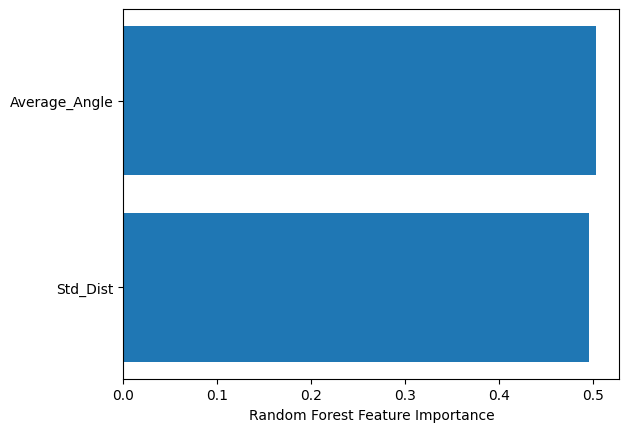

In [53]:
sorted_idx = best_clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], best_clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [54]:
np.sum(best_clf.feature_importances_)

1.0

KNN

In [55]:
grid_params = {'n_neighbors' : [i for i in range(1, 11)],
                'weights': ['uniform', 'distance'],
                'metric' : ['euclidean', 'manhattan']}

In [56]:
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, grid_params, verbose = 1, cv = 3, n_jobs = -1)
grid_knn.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [57]:
best_clf = grid_knn.best_estimator_
best_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [58]:
y_pred = best_clf.predict(X_test)

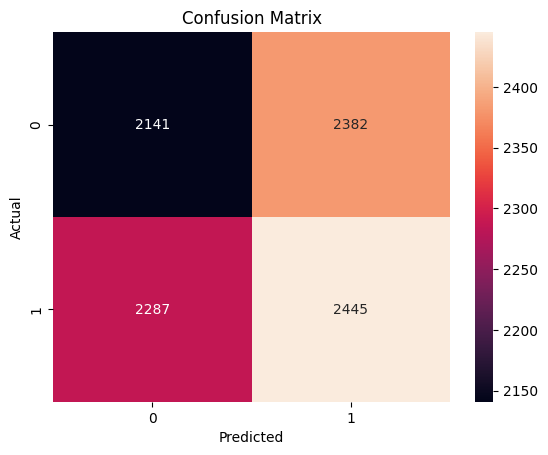

In [59]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [60]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.48      0.47      0.48      4523
     class 1       0.51      0.52      0.51      4732

    accuracy                           0.50      9255
   macro avg       0.50      0.50      0.49      9255
weighted avg       0.50      0.50      0.50      9255

